In [1]:
import torch
from PIL import Image
import requests

from pprint import pprint

from transformers import Blip2Processor, Blip2ForConditionalGeneration
import random

import pickle
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#os.environ['HF_HOME'] = '/var/scratch/ybi530/data'

device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
print(device)
img_path = '/var/scratch/ybi530/data/data/train2014/'
file_path = '/var/scratch/ybi530/result_Nov/'

cuda


In [2]:
import numpy as np

In [2]:
# df= pd.read_csv(file_path+'dis_blip_answer_all.csv')
df= pd.read_csv(file_path+'dis_mapl_answer_all.csv')

df
def return_option(x):
    if x:
        try:
            return x.rstrip('.')
        except:
            return ' '
    return ' '


acc_mapl = []
for i in range(30):
#     print(i)
    df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:return_option(x))
    cor = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
    print(cor/len(df))
    acc_mapl.append(cor/len(df))

0.22690517030139673
0.22445479049252634
0.20877235971575595
0.21710365106591523
0.23033570203381523
0.21587846116148002
0.22592501837784856
0.2112227395246263
0.21612349914236706
0.215633423180593
0.2190639549130115
0.22984562607204118
0.2144082332761578
0.2065670178877726
0.2131830433717226
0.21514334721881892
0.215633423180593
0.22298456260720412
0.22690517030139673
0.23450134770889489
0.21587846116148002
0.22788532222494487
0.22126929674099485
0.22592501837784856
0.21391815731438374
0.21391815731438374
0.22175937270276894
0.2293555501102671
0.23058074001470227
0.2163685371232541


In [58]:
# df= pd.read_csv(file_path+'dis_blip_answer_all.csv')
df= pd.read_csv(file_path+'dis_fromage_answer_all.csv')

df

acc_fro = []
for i in range(30):
    df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")
    cor = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
    acc_fro.append(cor/len(df))
print(acc_fro)

[0.19210977701543738, 0.2011761823082578, 0.18843420730213184, 0.19897084048027444, 0.1987258024993874, 0.2019112962509189, 0.2019112962509189, 0.20166625827003185, 0.20607694192599854, 0.19701053663317813, 0.19995099240382258, 0.2033815241362411, 0.20240137221269297, 0.20044106836559666, 0.19848076451850036, 0.20240137221269297, 0.20264641019358, 0.20534182798333742, 0.1987258024993874, 0.19750061259495222, 0.20142122028914483, 0.19823572653761334, 0.20754716981132076, 0.20607694192599854, 0.20313648615535407, 0.19259985297721147, 0.19431511884342073, 0.19210977701543738, 0.19039451114922812, 0.19750061259495222]


In [59]:
df.prompt_22

0       With both the image and my feeling in mind, ho...
1       With both the image and my feeling in mind, ho...
2       With both the image and my feeling in mind, ho...
3       With both the image and my feeling in mind, ho...
4       With both the image and my feeling in mind, ho...
                              ...                        
4076    With both the image and my feeling in mind, ho...
4077    With both the image and my feeling in mind, ho...
4078    With both the image and my feeling in mind, ho...
4079    With both the image and my feeling in mind, ho...
4080    With both the image and my feeling in mind, ho...
Name: prompt_22, Length: 4081, dtype: object

In [10]:
np.std(acc),np.mean(acc)

NameError: name 'acc' is not defined

In [55]:
df= pd.read_csv('temp29.csv')

In [56]:
acc_blip =[]
for i in range(30):
    df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:x[0])
    cor = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
    acc_blip.append(cor/len(df))
print(acc_blip)

[0.7569223229600588, 0.7569223229600588, 0.7476108796863514, 0.7667238421955404, 0.7569223229600588, 0.7549620191129625, 0.758147512864494, 0.7493261455525606, 0.757902474883607, 0.764518500367557, 0.771379563832394, 0.7603528546924774, 0.7498162215143347, 0.7610879686351385, 0.7601078167115903, 0.7427101200686106, 0.7532467532467533, 0.7576574369027199, 0.7547169811320755, 0.7701543739279588, 0.7652536143102181, 0.7598627787307033, 0.7422200441068365, 0.7623131585395736, 0.7588826268071551, 0.7566772849791717, 0.7534917912276403, 0.7632933104631218, 0.7591276647880422, 0.7373192844890958]


In [57]:
np.std(acc),np.mean(acc),

NameError: name 'acc' is not defined

In [14]:
df= pd.read_csv(file_path+'dis_idefics_answer_all.csv')

# df

In [15]:
def return_option(answer):
    try:
        x = answer.split('Assistant: ')[-1]
        if x[0] in ['A','B',"C","D","E"]:
            return x[0]
        if x.startswith('The answer is'):
            return x[14]
        if x.startswith('wer'):
            return x[5]
        else:             
            return 0
    except:
        return -1


acc_ide = []
for i in range(30):
    print(i)
    try:
        df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:return_option(x))
        cor = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
        print(cor/len(df))
        acc_ide.append(cor/len(df))
    except:
        pass

0
0.22862043616760597
1
0.3866699338397452
2
0.31315853957363393
3
0.3785836804704729
4
0.3678020093114433
5
0.30776770399411907
6
0.418279833374173
7
0.35187454055378586
8
0.38005390835579517
9
0.4209752511639304
10
0.3991668708649841
11
0.38323940210732665
12
0.44008821367311934
13
0.4697378093604509
14
0.4560156824307768
15
0.40112717471208037
16
0.36951727517765254
17
0.4391080617495712
18
0.31413869149718204
19
0.3543249203626562
20
0.27248223474638567
21
0.36314628767458956
22
0.4403332516540064
23
0.4033325165400637
24
0.3288409703504043
25
0.2195540308747856
26
0.294045577064445
27
0.29380053908355797
28
0.19603038470963
29
0.24234256309728008


In [16]:
import numpy as np

NameError: name 'acc_blip' is not defined

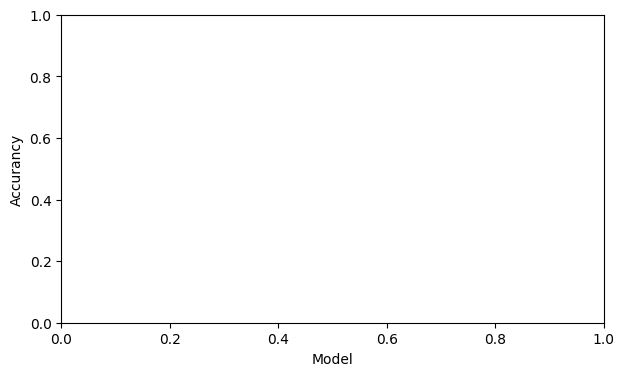

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7, 4))
ax= plt.gca()
plt.xlabel('Model')
plt.ylabel('Accurancy')
# plt.title('Distribution of Accurancy for 4 models across different prompts')
data = [acc_blip,acc_ide,acc_fro,acc_mapl]
g = sns.violinplot( data = data)



desc_type = []
g.set_xticklabels(['BLIP2','IDEFICS','FROMAGe','MAPL'])




#  添加平均值和标准差信息
for i in range(len(data)):
    mean_score = round(np.mean(data[i]), 2)
#     plt.text( 0.09+i,0.2+mean_score,mean_score, ha='center', va='bottom')
#     plt.text( 0.09+i,1.1,len(data[i]), ha='center', va='bottom')
#     plt.errorbar(desc_type, mean_score, yerr=std_dev, color='black', lw=2)

# 添加图例
# legend_labels = ['target','vis_decoy','lang_decoy','intention','action','vis_action',\
#                   'lang_action','coco']
# plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels))

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("paper/image/fig1.pdf", format="pdf")

plt.savefig("fig2.pdf", format="pdf")
plt.show()

In [10]:
np.std(acc),np.mean(acc),

(0.07212248309872919, 0.3544719431511884)

In [66]:
df= pd.read_csv('temp29.csv')
df['answer_prompt_0'] = df['answer_prompt_0'].apply(lambda x:x[0])
a = df[df['answer_prompt_0']==df['correct_action']].answer_prompt_0.value_counts().values

In [67]:
a

array([654, 651, 611, 598, 575])

In [68]:
b = df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts().values

In [69]:
b

array([276, 213, 180, 174, 149])

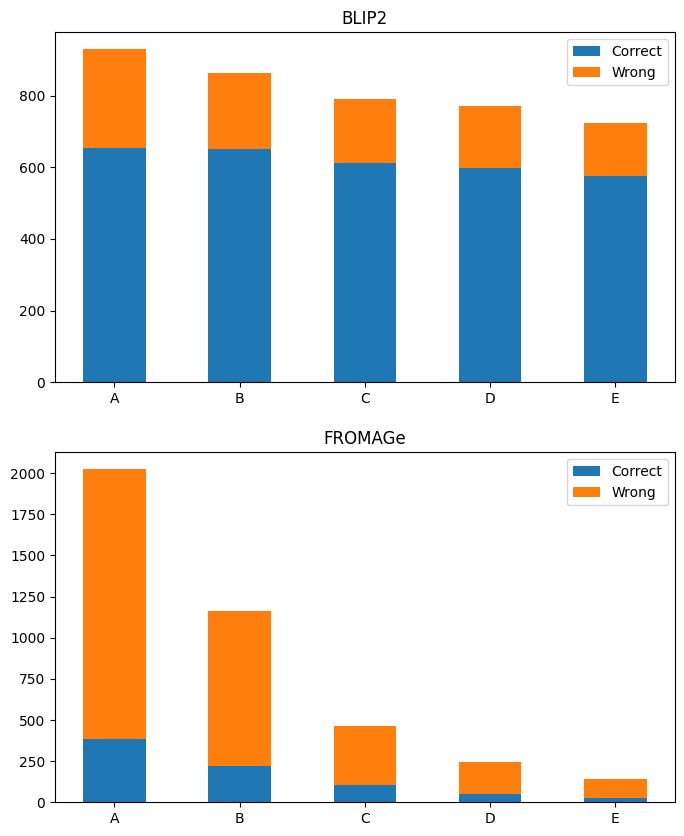

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/


species = (
    "A","B","C","D","E"
)
weight_counts = {
    "Correct": a,
    "Wrong": b
}
width = 0.5

fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 创建包含两个子图的图形，2行1列
width = 0.5

# fig, ax = plt.subplots()
ax1 = axes[0] 
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax1.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax1.set_title("BLIP2")
ax1.legend(loc="upper right")

ax2 = axes[1]
bottom = np.zeros(5)

for boolean, weight_count in weight_counts2.items():
    p = ax2.bar(species2, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax2.set_title("FROMAGe")
ax2.legend(loc="upper right")

plt.savefig("fig3.pdf", format="pdf")
plt.show()

In [74]:
df2= pd.read_csv(file_path+'dis_fromage_answer_all.csv')
df2['answer_prompt_0'] = df2['answer_prompt_0'].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")
a2 = df2[df2['answer_prompt_0']==df2['correct_action']].answer_prompt_0.value_counts().values

a2

array([384, 220, 105,  49,  26])

In [75]:
b2 = df2[df2['answer_prompt_0']!=df2['correct_action']].answer_prompt_0.value_counts().values[:5]
b2

array([1641,  945,  356,  197,  115])

In [76]:
# data from https://allisonhorst.github.io/palmerpenguins/

species2 = (
    "A","B","C","D","E"
)
weight_counts2 = {
    "Correct": a2,
    "Wrong": b2
}
width = 0.5

In [32]:
ax2 = axes[1]
bottom = np.zeros(5)

for boolean, weight_count in weight_counts2.items():
    p = ax2.bar(species2, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax2.set_title("FROMAGe")
ax2.legend(loc="upper right")

# plt.savefig("fig3.pdf", format="pdf")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


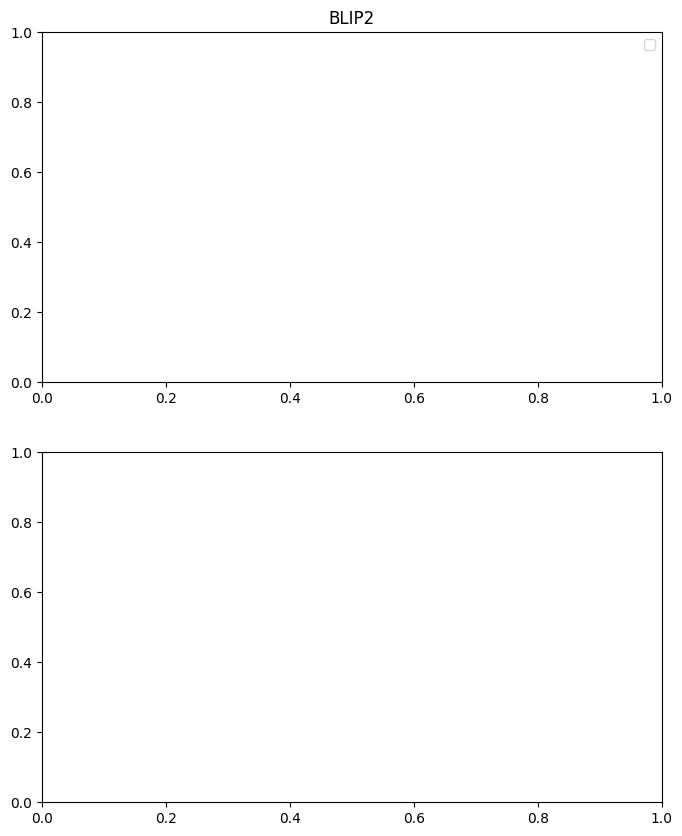

In [12]:
df= pd.read_csv(file_path+'dis_fromage_answer_all.csv')
df['answer_prompt_0'] = df['answer_prompt_0'].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")
a = df[df['answer_prompt_0']==df['correct_action']].answer_prompt_0.value_counts().values

a

b = df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts().values[:5]


# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "A","B","C","D","E"
)
weight_counts = {
    "Correct": a,
    "Wrong": b
}
width = 0.5

ax2 = axes[1]
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax2.set_title("FROMAGe")
ax2.legend(loc="upper right")

plt.savefig("fig3.pdf", format="pdf")
plt.show()

# plt.show()

In [31]:
df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts()

A    1641
B     945
D     356
C     197
E     115
I      28
Y       8
1       2
S       2
        2
b       1
Name: answer_prompt_0, dtype: int64

In [56]:
df= pd.read_csv(file_path+'dis_fromage_answer_all.csv')
df['answer_prompt_0'] = df['answer_prompt_0'].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")
a = df[df['answer_prompt_0']==df['correct_action']].answer_prompt_0.value_counts().values

a

b = df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts().values[:5]


# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "A","B","C","D","E"
)
weight_counts = {
    "Correct": a,
    "Wrong": b
}
width = 0.5

ax = axes[1]
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("FROMAGe")
ax.legend(loc="upper right")

plt.show()

In [23]:
df= pd.read_csv(file_path+'dis_mapl_answer_all.csv')
def return_option(x):
    
    if x:
        try:
            return x.rstrip('.')
        except:
            return ' '
    return ' '
df['answer_prompt_0'] = df['answer_prompt_0'].apply(lambda x:return_option(x))

a = df[df['answer_prompt_0']==df['correct_action']].answer_prompt_0.value_counts().values

a 

b = df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts().values[:5]

In [24]:
a = list(a)
a.append(0)

a = np.array(a)

In [41]:
b = list(b)
b.append(0)

b = np.arrby(b)


AttributeError: module 'numpy' has no attribute 'brrby'

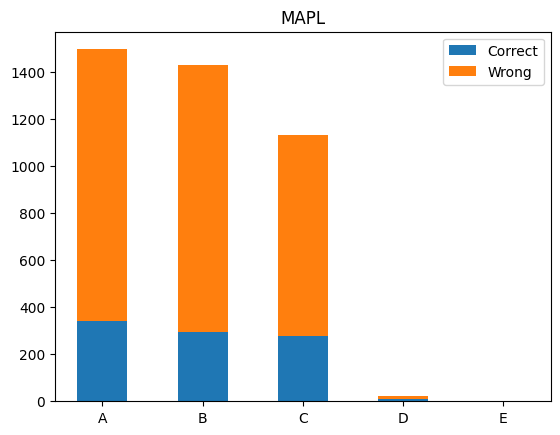

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "A","B","C","D","E"
)
weight_counts = {
    "Correct": a,
    "Wrong": b
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("MAPL")
ax.legend(loc="upper right")

plt.show()

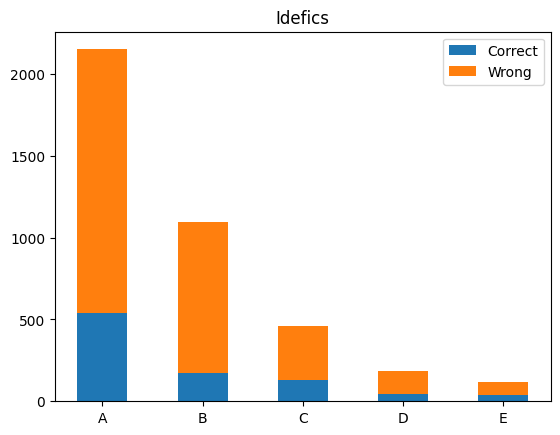

In [46]:
df= pd.read_csv(file_path+'dis_idefics_answer_all.csv')
def return_option(answer):
    try:
        x = answer.split('Assistant: ')[-1]
        if x[0] in ['A','B',"C","D","E"]:
            return x[0]
        if x.startswith('The answer is'):
            return x[14]
        if x.startswith('wer'):
            return x[5]
        else:             
            return 0
    except:
        return -1
df['answer_prompt_0'] = df['answer_prompt_0'].apply(lambda x:return_option(x))

a = df[df['answer_prompt_0']==df['correct_action']].answer_prompt_0.value_counts().values

a 

b = df[df['answer_prompt_0']!=df['correct_action']].answer_prompt_0.value_counts().values[:5]



import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "A","B","C","D","E"
)
weight_counts = {
    "Correct": a,
    "Wrong": b
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Idefics")
ax.legend(loc="upper right")

plt.show()

## Nan rate

In [90]:
df2= pd.read_csv(file_path+'dis_fromage_answer_all.csv')

In [91]:
df2['answer_prompt_0'] = df2['answer_prompt_0'].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")

In [103]:
sum_nan = 0
for i in range(29):
    df2['answer_prompt_'+str(i)] = df2['answer_prompt_'+str(i)].apply(lambda x:x.lstrip(" ")[0] if x.lstrip(" ") else "")
    res = df2['answer_prompt_'+str(i)].value_counts()
    nan_num = res[~res.index.isin(['A','B',"C",'D','E'])].sum()
    print(nan_num)
    sum_nan =+ nan_num
print(sum_nan/4081/30)

43
13
353
18
21
7
5
1
0
5
17
14
3
1
0
1
0
1
3
16
4
4
5
3
2
10
9
19
67
0.0005472514906477171


In [149]:
df3= pd.read_csv(file_path+'dis_mapl_answer_all.csv')

def return_option(x):
    
    if x:
        try:
            return x.rstrip('.')
        except:
            return ' '
    return ' '

sum_nan = 0
for i in range(29):
    df3['answer_prompt_'+str(i)] = df3['answer_prompt_'+str(i)].apply(lambda x:return_option(x))
    res = df3['answer_prompt_'+str(i)].value_counts()
    nan_num = res[~res.index.isin(['A','B',"C",'D','E'])].sum()
    print(nan_num)
    sum_nan += nan_num
print(sum_nan/4081/30)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
1
3.2671730784938334e-05


In [122]:
df3['answer_prompt_'+str(6)].value_counts()

B    1874
D    1334
A     845
E      27
C       1
Name: answer_prompt_6, dtype: int64

In [148]:
df4= pd.read_csv(file_path+'dis_idefics_answer_all.csv')

def return_option(answer):
    try:
        x = answer.split('Assistant: ')[-1]
        if x[0] in ['A','B',"C","D","E"]:
            return x[0]
        if x.startswith('The answer is'):
            return x[14]
        if x.startswith('wer'):
            return x[5]
        else:             
            return x
    except:
        pass

sum_nan = 0

for i in range(29):
    df4['answer_prompt_'+str(i)] = df4['answer_prompt_'+str(i)].apply(lambda x:return_option(x))
    res = df4['answer_prompt_'+str(i)].value_counts()
    nan_num = res[~res.index.isin(['A','B',"C",'D','E'])].sum()
    print(nan_num)
    sum_nan = sum_nan+ nan_num
print(sum_nan/4081/30)

926
405
750
265
437
640
276
227
620
151
123
417
144
179
179
152
480
214
991
839
1547
187
144
224
1013
1263
767
917
1171
0.12781181083067877
